# Class 2: Intro to Simple Models

## 1) Simplest Model
The simplest model is just using an average for the future.  
In math, an average is called a "mean".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# our data for the grades a student got in their last 10 classes
grades = [85, 90, 75, 80, 65, 70, 85, 95, 60, 85]
grades = np.array(grades)

In [3]:
# calculate the average grade
np.mean(grades)

79.0

Now we can make predictions for what grade a student might get in their next class. It's a very simple model.  
How could we make it better?

In [4]:
# here are the types of classes
class_type = [2, 2, 1, 1, 1, 1, 2, 2, 1, 2]
class_type = np.array(class_type)

In [5]:
# now let's filter on class type 2
grades_for_class_2 = grades[class_type == 2]

In [6]:
# now calculate the average
np.mean(grades_for_class_2)

88.0

## 2) Linear Model with Our Data

In [7]:
# read in our dataset
filename = 'https://raw.githubusercontent.com/sayhellojoel/grade78pythonmath/main/Data/kids%20anonymous%20data.csv'
df = pd.read_csv(filename)

In [8]:
# show the first 5 lines from our dataset
df.head(5)

,Student,Class,AGE (Y/M),Age Decimal,HEIGHT,FOOT LENGTH,INDEX FINGER,# LETTERS,EYE COLOUR
0,1,78,12-11,12.9,174,26,10,5,Blue
1,2,78,13/11,13.9,173,24,9,5,Green
2,3,78,13\6,13.5,173,28,9,5,Brown
3,4,78,13/12,13.9,152,22,8,5,Brown
4,5,78,13/8,13.7,162,23,9,5,Green


### Scatterplot
It's always a good idea to look at your data before trying anything else.  
Here, we can visually see the trend in the data.  

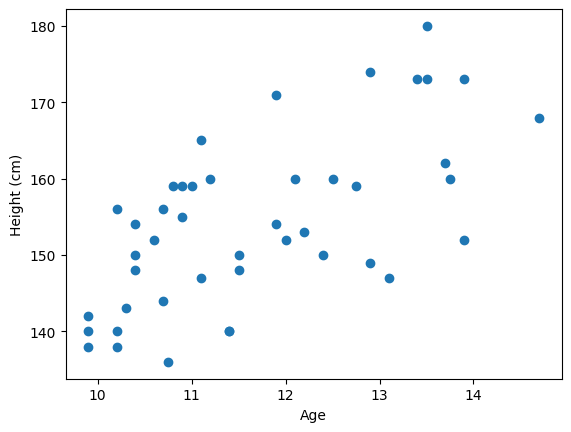

In [9]:
# let's visualize our data to start with
plt.scatter(df['Age Decimal'], df['HEIGHT'])
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.show()

In [10]:
m, b = np.polyfit(df['Age Decimal'], df['HEIGHT'], 1)
print('The slope is', m)
print('The intercept is', b)

The slope is 5.400521844211616
The intercept is 91.16458157794895


In [11]:
min_value = min(df['Age Decimal'])
max_value = max(df['Age Decimal'])
x = [min_value, max_value]
x = np.array(x)
x

array([ 9.9, 14.7])

In [12]:
y = m*x + b
y

array([144.62974784, 170.55225269])

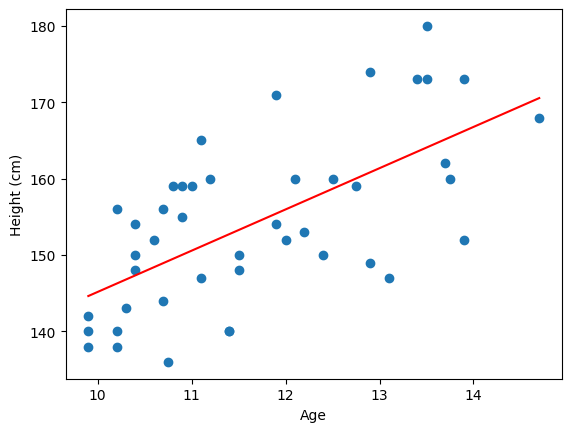

In [13]:
# let's visualize our data to start with
plt.scatter(df['Age Decimal'], df['HEIGHT'])
plt.plot(x, y, color='red')
plt.xlabel('Age')
plt.ylabel('Height (cm)')
plt.show()

## Checking Other Variables
Now let's check if any other variables look like they could predict height.

In [14]:
df.columns

Index(['Student', 'Class', 'AGE (Y/M)', 'Age Decimal', 'HEIGHT', 'FOOT LENGTH',
       'INDEX FINGER', '# LETTERS', 'EYE COLOUR'],
      dtype='object')

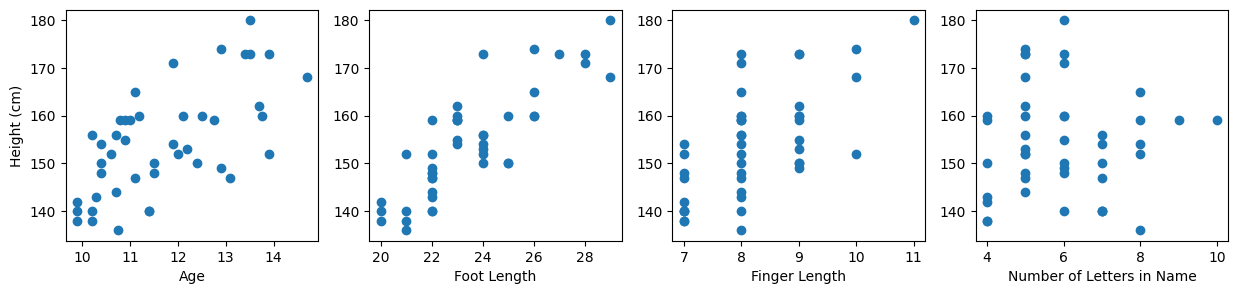

In [15]:
# let's visualize our data to start with
plt.figure(figsize=(15, 3))

plt.subplot(1, 4, 1)
plt.scatter(df['Age Decimal'], df['HEIGHT'])
plt.xlabel('Age')
plt.ylabel('Height (cm)')

plt.subplot(1, 4, 2)
plt.scatter(df['FOOT LENGTH'], df['HEIGHT'])
plt.xlabel('Foot Length')

plt.subplot(1, 4, 3)
plt.scatter(df['INDEX FINGER'], df['HEIGHT'])
plt.xlabel('Finger Length')

plt.subplot(1, 4, 4)
plt.scatter(df['# LETTERS'], df['HEIGHT'])
plt.xlabel('Number of Letters in Name')

plt.show()

In [16]:
# check correlation of each variable with height
correlation = df[['Age Decimal', 'HEIGHT', 'FOOT LENGTH', 'INDEX FINGER', '# LETTERS']].corr()

# Print the correlations
print(correlation['HEIGHT'].round(2))

Age Decimal     0.64
HEIGHT          1.00
FOOT LENGTH     0.83
INDEX FINGER    0.63
# LETTERS       0.02
Name: HEIGHT, dtype: float64


# New Model with Best Predictor (Foot Length)
Now let's make a new model with our best predictor: foot length.

In [17]:
m, b = np.polyfit(df['FOOT LENGTH'], df['HEIGHT'], 1)
print('The slope is', m)
print('The intercept is', b)

The slope is 3.9714672598897405
The intercept is 60.8757133185027


In [25]:
min_value = min(df['FOOT LENGTH'])
max_value = max(df['FOOT LENGTH'])
x = [min_value, max_value]
x = np.array(x)

y = m * x + b

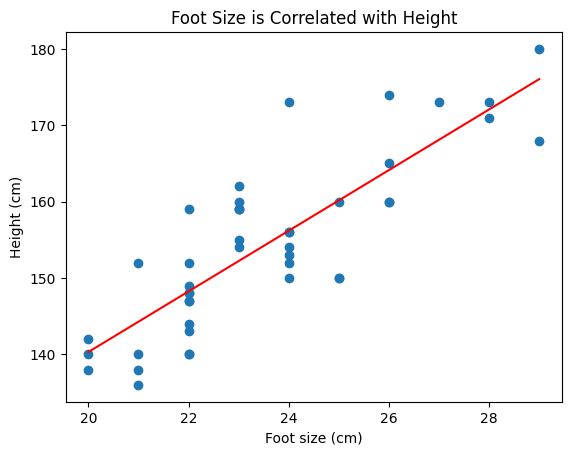

In [27]:
# let's visualize our data to start with
plt.scatter(df['FOOT LENGTH'], df['HEIGHT'])
plt.title('Foot Size is Correlated with Height')
plt.plot(x, y, color='red')
plt.xlabel('Foot size (cm)')
plt.ylabel('Height (cm)')
plt.show()